In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('cn.csv')

In [3]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,116,16.263292,172.16.57.143,172.16.57.115,FTP,102,Response: 220 Welcome to MANTRA FTP service.
1,267,32.259493,172.16.57.115,172.16.57.143,FTP,78,Request: USER nplab
2,269,32.260387,172.16.57.143,172.16.57.115,FTP,100,Response: 331 Please specify the password.
3,342,44.642440,172.16.57.115,172.16.57.143,FTP,84,Request: PASS manipal@123
4,344,44.670059,172.16.57.143,172.16.57.115,FTP,89,Response: 230 Login successful.


In [4]:
from matplotlib import pyplot
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,116,16.263292,172.16.57.143,172.16.57.115,FTP,102,Response: 220 Welcome to MANTRA FTP service.
1,267,32.259493,172.16.57.115,172.16.57.143,FTP,78,Request: USER nplab
2,269,32.260387,172.16.57.143,172.16.57.115,FTP,100,Response: 331 Please specify the password.
3,342,44.642440,172.16.57.115,172.16.57.143,FTP,84,Request: PASS manipal@123
4,344,44.670059,172.16.57.143,172.16.57.115,FTP,89,Response: 230 Login successful.
5,346,44.670167,172.16.57.115,172.16.57.143,FTP,72,Request: SYST
6,348,44.670591,172.16.57.143,172.16.57.115,FTP,85,Response: 215 UNIX Type: L8
7,421,54.802255,172.16.57.115,172.16.57.143,FTP,76,Request: MKD mini
8,423,54.802990,172.16.57.143,172.16.57.115,FTP,87,"Response: 257 ""/mini"" created"
9,437,58.569536,172.16.57.115,172.16.57.143,FTP,72,Request: QUIT


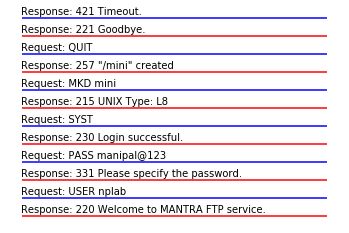

In [5]:
# Import Library

import matplotlib.pyplot as plt
dt=df['Info']
dp=df['Time']
# Plot horizontal line

for x in range(12):
    y=x+0.2
    plt.text(0,y,dt[x],rotation=360)
    if(x%2==0):
        plt.hlines(x,21,5640,color='red') 
    else:
        plt.hlines(x,21,5640,color='blue')


# Show
plt.axis('off')
plt.show()

In [12]:
print('Time\t172.16.57.143\t\t\t\t\t\t\t172.16.57.115')
for x in range(0,11,2):
    print('\t\t\t'+dt[x])
    print("{:.2f}".format(dp[x]),'|\t(5640)|<----------------------------------------------------|(21)')
    print('\t\t\t'+dt[x+1])
    print("{:.2f}".format(dp[x+1]),'|\t(5640)|---------------------------------------------------->|(21)')

Time	172.16.57.143							172.16.57.115
			Response: 220 Welcome to MANTRA FTP service.
16.26 |	(5640)|<----------------------------------------------------|(21)
			Request: USER nplab
32.26 |	(5640)|---------------------------------------------------->|(21)
			Response: 331 Please specify the password.
32.26 |	(5640)|<----------------------------------------------------|(21)
			Request: PASS manipal@123
44.64 |	(5640)|---------------------------------------------------->|(21)
			Response: 230 Login successful.
44.67 |	(5640)|<----------------------------------------------------|(21)
			Request: SYST
44.67 |	(5640)|---------------------------------------------------->|(21)
			Response: 215 UNIX Type: L8
44.67 |	(5640)|<----------------------------------------------------|(21)
			Request: MKD mini
54.80 |	(5640)|---------------------------------------------------->|(21)
			Response: 257 "/mini" created
54.80 |	(5640)|<----------------------------------------------------|(21)
			Request: 